The goal of this notebook is to examine the theoretical predictions (a la the relaxation method) for the surface waves internal wave interactions. 

Specifically, in the overleaf we show that this reduces to solving: 
$$
    \mu \delta N = k\frac{\partial \delta U}{\partial x} \frac{\partial N_0}{\partial x}.
$$
In the original formulation of Alpers (1985), $\tau$ was taken to be a constant. If you look into Nicolas's recent work, you can see they use it as a general parameter. Dangerous! I'll start by assuming it's constant, and then we can see if we need to do something fancier. 

In [2]:
cd /Users/npizzo/Documents/GitHub/IW
imatlab_export_fig('print-png') 
load('nick.mat')
load('nick2.mat')
load('Pizzo_background.mat');
load('ForNick2.mat');

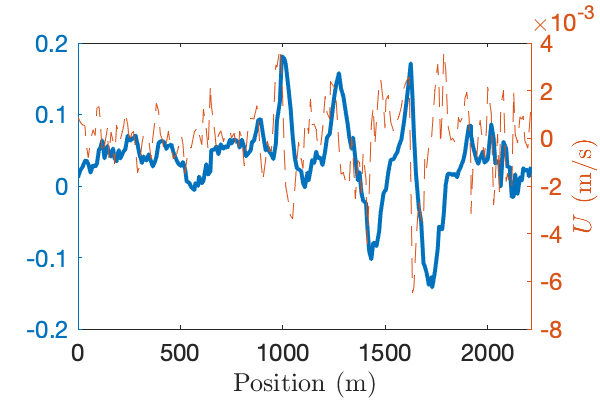

In [6]:
%% Loook at currents. 
x = Longitude*111319.5; 
x = x-x(1);
g = 9.81;
clf
% subplot(2,1,1)
set(gca, 'fontsize', 12)
xlabel('Longitude', 'interpreter', 'latex')
xlim([ min(x) max(x)])
yyaxis left
plot(x, U, 'linewidth',2)
dudx = gradient(U)./gradient(x);
% hold on
yyaxis right
plot(x, dudx, '--')
set(gca, 'fontsize',12)
xlabel('Position (m)', 'interpreter', 'latex')
ylabel('$U$ (m/s)', 'interpreter', 'latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf, 'color', 'w');

KX = background.KX;
KY = background.KY;
Spec = background.Eoka2;
% redefine KX,KY,Spec to only include positive kx branch. 
KX2 = KX(:,512:end);
KY2 = KY(:,512:end);
Ly = length(KX2(:,1));
Lx = length(KX2(1,:));
Spec2 = Spec(:,512:end);

In [7]:
%% Next, compute the background action, and its gradient 
% with respect to k
dNodk=zeros(Ly,Lx);
No=Spec2./sqrt(g*sqrt(KY2.^2+KX2.^2));
for i=1:Ly
    dNodk(i,:)=gradient(No(i,:))./gradient(KX2(1,:));
end

In [35]:
%% we need to do this for each band. 
deltaN = zeros(Ly,Lx,6);N=deltaN;S=deltaN;
tau = 100;
for j = 1:6
for i = 1:Ly
    deltaN(i,:,j) = tau*SUB{j}.dUdx.*KX2(i,:).*dNodk(i,:);
end
end

for i = 1:6
N(:,:,i) = No + deltaN(:,:,i);
S(:,:,i) = N(:,:,i).*sqrt(g*sqrt(KY2.^2+KX2.^2));
end
% omnidirectional spectra
% background spectra
[XFFT_rt, theta, r, xZ, yZ] = xy2rt(background.Eoka2,...
    background.KX(1,:), background.KY(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    background_omnidir_PHI = nansum(omnidir_fft_t);
    background_omnidir_k  = r;
% compute theoretical omnidirectional spectra   
%
theory_omni = zeros(1021,6); 
theory_k = theory_omni;
for j = 1:6
    
 [XFFT_rt, theta, r, xZ, yZ] = xy2rt(S(:,:,j), KX2(1,:), KY2(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    theory_omni(:,j) = nansum(omnidir_fft_t);
    theory_k(:,j)  = r;   
end

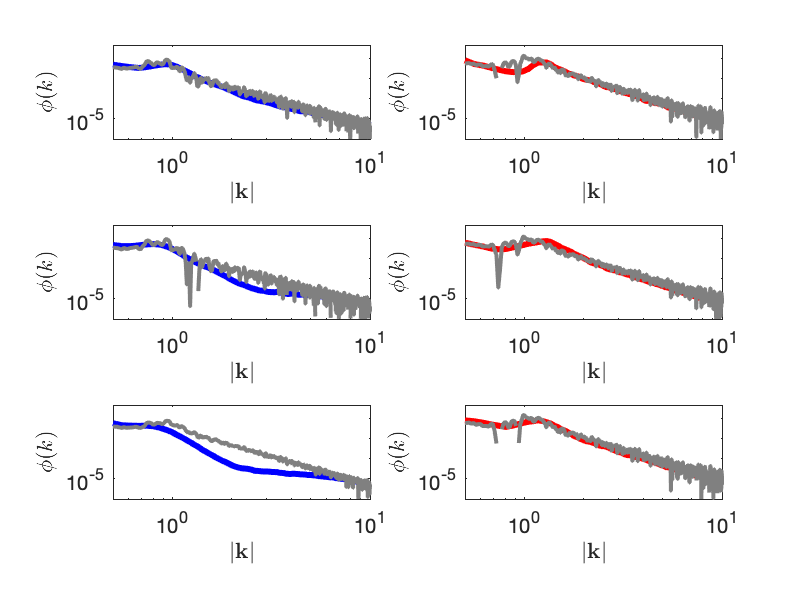

In [36]:
% look at all the bands
clf
subplot(3,2,5)
loglog(SUB{1}.omnidir_k ,...
    SUB{1}.omnidir_PHI,'b','linewidth',3)
hold on
loglog(theory_k(:,1), 2*theory_omni(:,1) ,...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,3)
loglog(SUB{2}.omnidir_k ,...
    SUB{2}.omnidir_PHI,'b','linewidth',3 )
hold on
loglog(theory_k(:,2),2*theory_omni(:,2) ,...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,1)
loglog(SUB{3}.omnidir_k ,...
    SUB{3}.omnidir_PHI,'b','linewidth',3 )
hold on
loglog(theory_k(:,3),2*theory_omni(:,3) ,...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,6)
loglog(SUB{4}.omnidir_k ,...
    SUB{4}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,4),2*theory_omni(:,4),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,4)
loglog(SUB{5}.omnidir_k ,...
    SUB{5}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,5),2*theory_omni(:,5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,2)
loglog(SUB{6}.omnidir_k ,...
    SUB{6}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,6),2*theory_omni(:,6),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 400, 300])


Here, the blue curves are the smooth bands, and increase in distance to the west as we move down rows. The red curves are the rough bands. We can see that there are varying degrees of success here for different locations along the bands. The grey curves are the theory. 

Note, here $\tau = 100 s$, a constant. 

We now try to do this again, when $\tau$ is taken to be a function of $(k,l)$.

Here, we've taken $$\tau = \tau_0 k$$.


In [39]:
%% Redoc computation for tau a function of k
deltaN = zeros(Ly,Lx,6);N=deltaN;S=deltaN;
tau = 100;
for j = 1:6
for i = 1:Ly
    deltaN(i,:,j) = tau*KX2(i,:).^(.25).*SUB{j}.dUdx.*1.*dNodk(i,:);
end
end

for i = 1:6
N(:,:,i) = No + deltaN(:,:,i);
S(:,:,i) = N(:,:,i).*sqrt(g*sqrt(KY2.^2+KX2.^2));
end
% omnidirectional spectra
% background spectra
[XFFT_rt, theta, r, xZ, yZ] = xy2rt(background.Eoka2,...
    background.KX(1,:), background.KY(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    background_omnidir_PHI = nansum(omnidir_fft_t);
    background_omnidir_k  = r;
% compute theoretical omnidirectional spectra   
%
theory_omni = zeros(1021,6); 
theory_k = theory_omni;
for j = 1:6
    
 [XFFT_rt, theta, r, xZ, yZ] = xy2rt(S(:,:,j), KX2(1,:), KY2(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    theory_omni(:,j) = nansum(omnidir_fft_t);
    theory_k(:,j)  = r;   
end

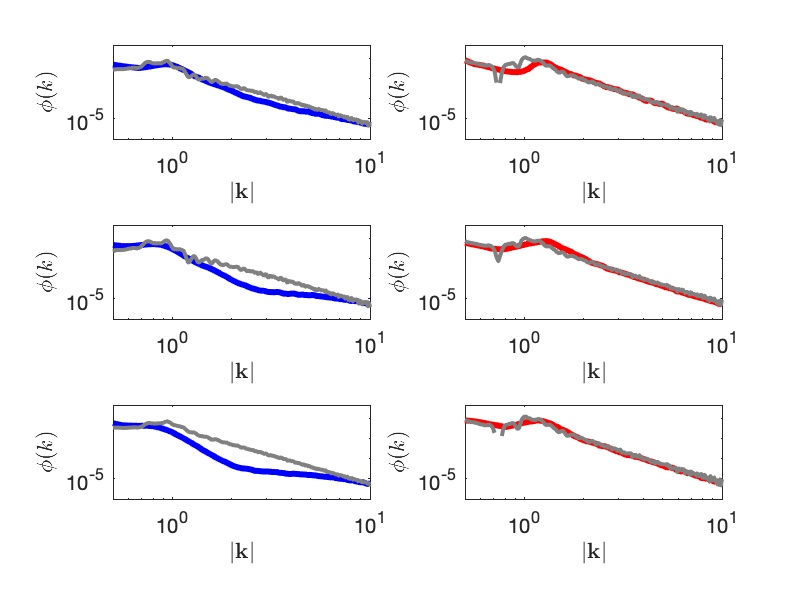

In [40]:
% look at all the bands
clf
subplot(3,2,5)
loglog(SUB{1}.omnidir_k ,...
    SUB{1}.omnidir_PHI,'b','linewidth',3)
hold on
loglog(theory_k(:,1), 2*smooth(theory_omni(:,1),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,3)
loglog(SUB{2}.omnidir_k ,...
    SUB{2}.omnidir_PHI,'b','linewidth',3 )
hold on
loglog(theory_k(:,2),2*smooth(theory_omni(:,2),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,1)
loglog(SUB{3}.omnidir_k ,...
    SUB{3}.omnidir_PHI,'b','linewidth',3 )
hold on
loglog(theory_k(:,3),2*smooth(theory_omni(:,3),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,6)
loglog(SUB{4}.omnidir_k ,...
    SUB{4}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,4),2*smooth(theory_omni(:,4),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,4)
loglog(SUB{5}.omnidir_k ,...
    SUB{5}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,5),2*smooth(theory_omni(:,5),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,2)
loglog(SUB{6}.omnidir_k ,...
    SUB{6}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,6),2*smooth(theory_omni(:,6),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 400, 300])
